In [2]:
# get the data

import pandas as pd
import numpy as np

In [3]:
housing = pd.read_csv('./data/housing.csv')

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


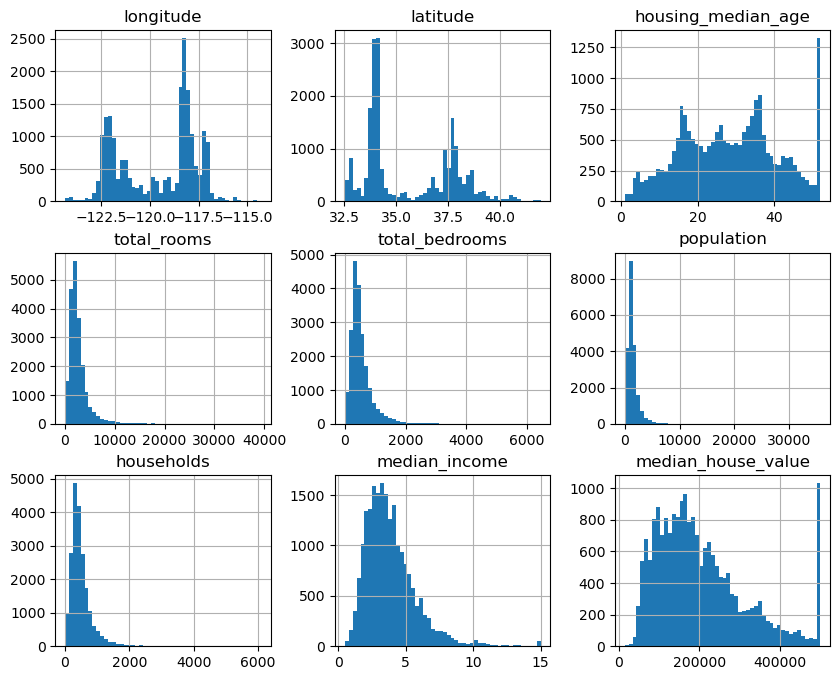

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(10,8))
plt.show()

In [9]:
# division del conjunto

import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# No complicarse = sklearn

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


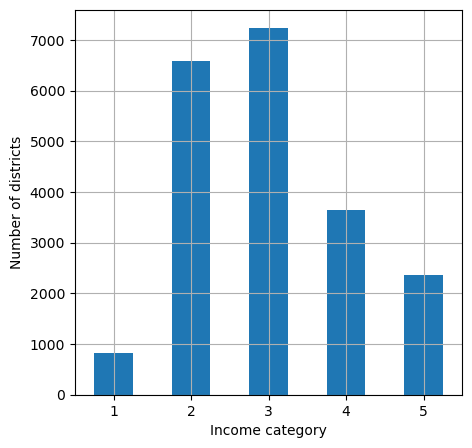

In [11]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True, figsize=(5,5))
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(housing, housing['income_cat']):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [13]:
strat_train_set, strat_test_set = strat_splits[0]

In [14]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [15]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

C:\Users\ferpi\AppData\Local\Temp\ipykernel_13400\4166485955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('income_cat', axis=1, inplace=True)
C:\Users\ferpi\AppData\Local\Temp\ipykernel_13400\4166485955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('income_cat', axis=1, inplace=True)


In [16]:
housing = strat_train_set.copy()

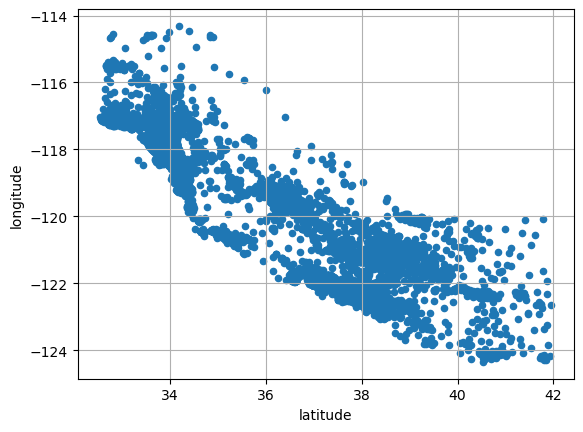

In [17]:
housing.plot(kind='scatter', x='latitude', y='longitude', grid=True)
plt.show()

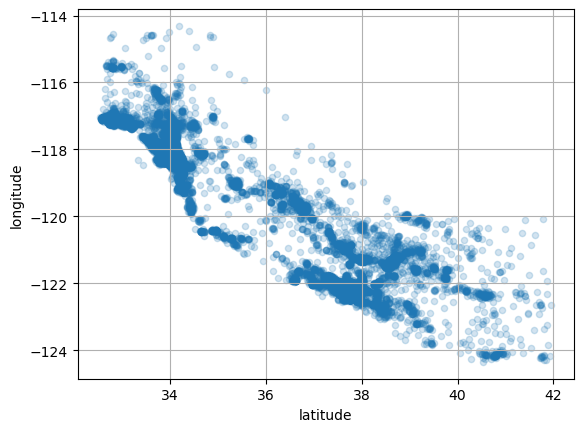

In [18]:
# uso de alpha=0.2, para ver mejor las areas con mas densidad, y menos densidad
housing.plot(kind='scatter', x='latitude', y='longitude', grid=True, alpha=0.2)
plt.show()

In [19]:
len_div = (housing['population'] / 100)
print(f"All values {len(housing['population'])}, \n Div entre 100: {len_div}")

All values 16512, 
 Div entre 100: 12655    22.37
15502    20.15
2908      6.67
14053     8.98
20496    18.37
         ...  
15174    20.26
12661    47.69
19263     4.58
19140    12.08
19773     6.25
Name: population, Length: 16512, dtype: float64


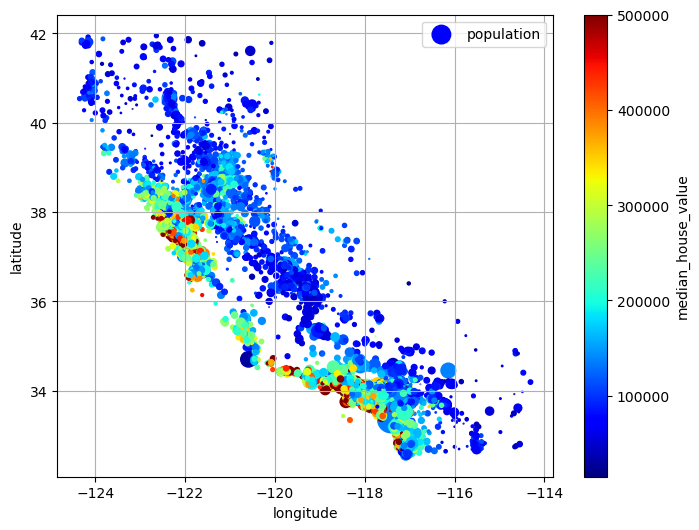

In [20]:
housing.plot(kind='scatter', 
             x='longitude', 
             y='latitude', 
             grid=True,
             s=housing['population'] / 100,
             label='population',
             c='median_house_value',
             cmap='jet',
             colorbar=True,
             legend=True,
             sharex=False,
             figsize=(8,6)
            )
plt.show()

In [21]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [23]:
corr_matrix = housing.corr(numeric_only=True)

#### [Correlation Matrix](https://www.youtube.com/watch?v=IBMrXyTR6CU)

Que labels de nuestro datasets influyen mas en nuestro target (ordenado de mayor a menor)

In [24]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

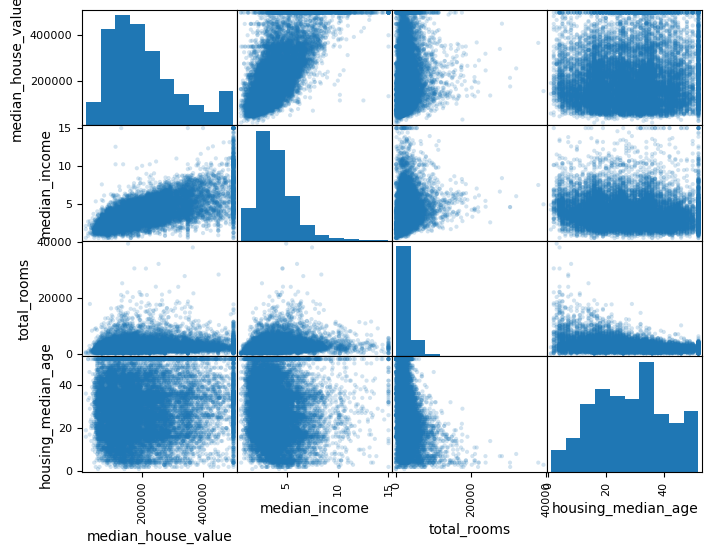

In [25]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], alpha=(0.2), figsize=(8,6))
plt.show()

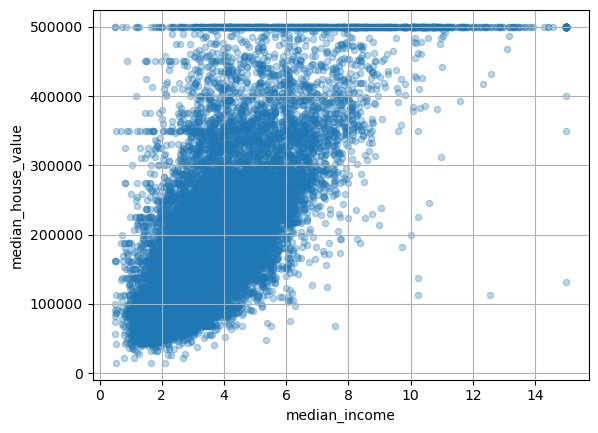

In [26]:
housing.plot(kind='scatter',
            x='median_income',
            y='median_house_value',
            alpha=0.3,
            grid=True)
plt.show()

In [27]:
housing.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [28]:
housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']


In [29]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_house',
       'bedrooms_ratio', 'people_per_house'],
      dtype='object')

In [30]:
housing.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466,-0.028374,0.095645,-0.000415
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673,0.107665,-0.116955,0.005426
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146,-0.147184,0.136768,0.015031
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140,0.127549,-0.192655,-0.024806
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781,0.000426,0.086883,-0.028364
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882,-0.074665,0.037736,0.076232
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590,-0.082971,0.067090,-0.027411
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151,0.311528,-0.624650,0.021815
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000,0.146255,-0.259952,-0.021991
rooms_per_house,-0.028374,0.107665,-0.147184,0.127549,0.000426,-0.074665,-0.082971,0.311528,0.146255,1.000000,-0.398529,-0.005316


In [31]:
corr_matrix = housing.corr(numeric_only=True)

corr_matrix['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687151
rooms_per_house       0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
people_per_house     -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedrooms_ratio       -0.259952
Name: median_house_value, dtype: float64

### Prepare the data for `Machine Learning Algorithms`


In [32]:
housing = strat_train_set.drop("median_house_value", axis=1) # x ...x1...x2...xn
housing_labels = strat_train_set["median_house_value"].copy() # y

In [33]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [34]:
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [35]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [36]:
median = housing['total_bedrooms'].median() 
housing['total_bedrooms'].fillna(median, inplace=True)

In [37]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [38]:
# SimpleImputer

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [39]:
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [40]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [41]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [42]:
X = imputer.fit_transform(housing_num)

In [43]:
housing_tr = pd.DataFrame(data=X,
                columns=housing_num.columns,
                index=housing_num.index)

In [44]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [45]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [46]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [47]:
housing_cat = housing[['ocean_proximity']]

In [48]:
housing_cat[:20]

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [49]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)



In [50]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [51]:
# one-hot-encoder

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [52]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [53]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [54]:
# no siempre recomendado, siempre 1HE > 

df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [56]:
cat_encoder.transform(df_test).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [57]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [58]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown).toarray()

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [59]:
cat_encoder.feature_names_in_


array(['ocean_proximity'], dtype=object)

In [60]:
cat_encoder.get_feature_names_out()



array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [61]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown).toarray(),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)



In [62]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


### Feature Scaling and transformation

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
min_man_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_man_scaler.fit_transform(housing_num)

In [65]:
# sin normalization

housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [66]:
print(f"{len(housing_num_min_max_scaled)}...... \n {len(housing_num)}")

16512...... 
 16512


In [67]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [68]:
housing_num_std_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

In [69]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1) 

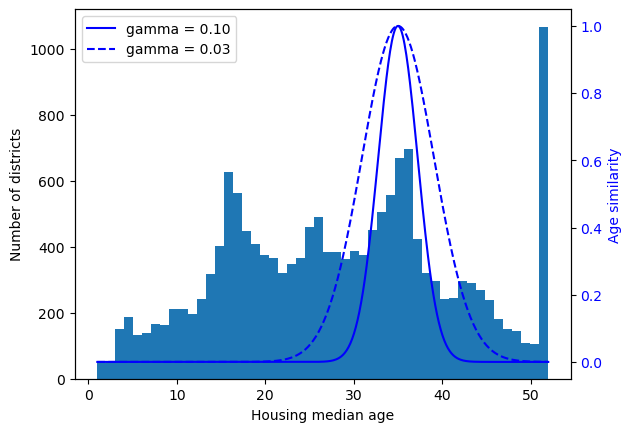

In [70]:
# extra code – this cell generates Figure 2–18

ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
# save_fig("age_similarity_plot")
plt.show()

In [71]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

#### Custom Transformers

In [72]:
import time
print(time.asctime())

Fri Aug  9 17:47:37 2024


In [73]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing['population'])

In [74]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [75]:
age_simil_35

array([[2.73237224e-02],
       [8.93948745e-35],
       [3.03539138e-04],
       ...,
       [4.57533877e-08],
       [7.04065961e-20],
       [1.66155727e-03]])

In [76]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [77]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [78]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):

    def __init__(self, with_mean=True): #no *args or **kwargs
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!
    
    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [79]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [80]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

In [81]:
similarities[:3].round(2)

array([[0.  , 0.49, 0.31, 0.  , 0.  , 0.  , 0.  , 0.85, 0.  , 0.16],
       [0.4 , 0.  , 0.  , 0.  , 0.  , 0.95, 0.11, 0.  , 0.  , 0.  ],
       [0.02, 0.  , 0.  , 0.15, 0.  , 0.  , 0.12, 0.  , 0.37, 0.  ]])

In [82]:
import time
time.asctime()

'Fri Aug  9 17:48:14 2024'

In [83]:
# Pipelines

from sklearn.pipeline import Pipeline

numerical_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('standardize', StandardScaler())
])

In [84]:
housing_num_prepared = numerical_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-0.94,  1.35,  0.03,  0.58,  0.64,  0.73,  0.56, -0.89],
       [ 1.17, -1.19, -1.72,  1.26,  0.78,  0.53,  0.72,  1.29]])

In [85]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, 
    columns=numerical_pipeline.get_feature_names_out(),
    index=housing_num.index
)

In [86]:
df_housing_num_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752


In [87]:
df_housing_num_prepared.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [88]:
# Una vez listos los Pipelines, usamos ColumnTransformer

from sklearn.compose import ColumnTransformer

num_attr = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income']

cat_attr = ['ocean_proximity']

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attr),
    ('cat', cat_pipeline, cat_attr),
])

In [89]:
from sklearn.compose import make_column_selector, make_column_transformer
'''
Aplica transformaciones específicas a columnas en un solo paso.
Simplifica y organiza mejor el preprocesamiento de datos.
'''
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [90]:
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000029FB16C3A10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000029FB10FA050>)])

In [91]:
housing_prepared = preprocessing.fit_transform(housing)

In [92]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.cluster import KMeans  # Solo si ClusterSimilarity no está definido en tu código

def column_ratio(X):
    return X[:,[0]] / X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"] #feature names out

def ratio_pipeline():

    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

log_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log, feature_names_out='one-to-one'),
    StandardScaler()
)    

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

preprocessing = ColumnTransformer([
    ('bedrooms', ratio_pipeline(), ['total_bedrooms', 'total_rooms']),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
     ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
],
remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [93]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [94]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [95]:
print(preprocessing.get_feature_names_out())

['bedrooms__ratio' 'rooms_per_house__ratio' 'people_per_house__ratio'
 'log__total_bedrooms' 'log__total_rooms' 'log__population'
 'log__households' 'log__median_income' 'geo__Cluster 0 similarity'
 'geo__Cluster 1 similarity' 'geo__Cluster 2 similarity'
 'geo__Cluster 3 similarity' 'geo__Cluster 4 similarity'
 'geo__Cluster 5 similarity' 'geo__Cluster 6 similarity'
 'geo__Cluster 7 similarity' 'geo__Cluster 8 similarity'
 'geo__Cluster 9 similarity' 'cat__ocean_proximity_<1H OCEAN'
 'cat__ocean_proximity_INLAND' 'cat__ocean_proximity_ISLAND'
 'cat__ocean_proximity_NEAR BAY' 'cat__ocean_proximity_NEAR OCEAN'
 'remainder__housing_median_age']


In [96]:
len(preprocessing.get_feature_names_out())

24

Revisar ***main-md.ipynb*** file para el resumen.

In [97]:
import time
print(time.asctime())

Fri Aug  9 17:55:27 2024


##### Select and Train a Model **|88|**

In [98]:
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [99]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels) # X = housing | y = housing_labels

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000029FA939F710>)])),
                ('linearregression', LinearRegression())])

In [100]:
housing_predictions = lin_reg.predict(housing)

In [101]:
housing_predictions[:5].round(-2)

array([ 71100., 289400., 180200., 190100., 277000.])

In [102]:
housing_labels.iloc[:5].values # repasar .iloc[]

array([ 72100., 279600.,  82700., 112500., 238300.])

In [103]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels,
                              housing_predictions,
                              squared=False)
lin_rmse 

69206.78692511137

##### Ejemplo claro del underfitting. 
**Como se soluciona?**  
* Seleccionar modelo mas potente
* Alimentar el training dataset con mejores features
* Reducir las contras del modelo 

In [104]:
# primero probamos un modelo mas potente

from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, 
                         DecisionTreeRegressor(random_state=42),
                         )
tree_reg.fit(X=housing, y=housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000029FA939F710>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [105]:
housing_predictions = tree_reg.predict(housing)

In [106]:
tree_rmse = mean_squared_error(y_true=housing_labels,
                                y_pred=housing_predictions,
                                squared=False)
tree_rmse

0.0

In [107]:
print(time.asctime())

Fri Aug  9 18:02:37 2024


In [108]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg,
                             housing,
                             housing_labels,
                             scoring='neg_root_mean_squared_error',
                             cv=10)

'''
tree_rmses_neg = -cross_val_score(tree_reg,
                             housing,
                             housing_labels,
                             scoring='neg_root_mean_squared_error',
                             cv=10)
'''

"\ntree_rmses_neg = -cross_val_score(tree_reg,\n                             housing,\n                             housing_labels,\n                             scoring='neg_root_mean_squared_error',\n                             cv=10)\n"

In [ ]:
# print(f"Positive: {tree_rmses} \n \n Negative: {tree_rmses_neg} \n")

In [109]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     67246.223781
std       2725.624587
min      62414.452955
25%      66279.645501
50%      67663.087642
75%      68587.871890
max      71549.880237
dtype: float64

In [110]:
# Let's try one last model now:

from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(
    preprocessing, #datos ya listos
    RandomForestRegressor(random_state=42)
)

forest_rmses = -cross_val_score(
    forest_reg,
    housing,
    housing_labels,
    scoring='neg_root_mean_squared_error',
    cv=10
)


In [111]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47321.684513
std       2546.339651
min      43625.026527
25%      45208.993255
50%      47291.793601
75%      49110.897190
max      51288.317779
dtype: float64

#### Fine-Tune the model:

In [112]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('random_forest', RandomForestRegressor(random_state=42))
])

# Definición de los hiperparámetros a probar
param_grid = [
    {'preprocessing__geo__n_clusters': [5,8,10],
     'random_forest__max_features': [4,6,8]},
     {'preprocessing__geo__n_clusters': [10,15],
      'random_forest__max_features': [6,8,10]}
]

# Configuración de GridSearchCV
grid_search = GridSearchCV(
    full_pipeline,
    param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error'
)

# Ajuste del modelo
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000029FA939F710>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [113]:
# best combination of hyperparameters:

grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

*In this example the best model is obtained by setting **n_clusters** to 15, and setting **max_features** to 8*

In [114]:
grid_search.cv_results_

{'mean_fit_time': array([2.84679516, 3.91250006, 4.86169306, 2.95460622, 3.90512959,
        4.98931305, 2.92128261, 3.92811902, 4.93942801, 3.88457688,
        4.98988835, 5.99182868, 4.01120043, 5.07290411, 6.0298574 ]),
 'std_fit_time': array([0.04723277, 0.07240863, 0.06651115, 0.01909735, 0.03846292,
        0.07773499, 0.03532592, 0.0323978 , 0.08910747, 0.06493754,
        0.05927862, 0.09852697, 0.05327849, 0.1144292 , 0.08601673]),
 'mean_score_time': array([0.09236828, 0.09637149, 0.09081109, 0.09240548, 0.08995708,
        0.09421714, 0.09123047, 0.09108806, 0.08996924, 0.08996685,
        0.092314  , 0.09227339, 0.09406408, 0.095848  , 0.09224463]),
 'std_score_time': array([0.00077636, 0.00558839, 0.000478  , 0.00223135, 0.00108773,
        0.00337393, 0.00030513, 0.00010699, 0.00024223, 0.00143135,
        0.00233256, 0.00267482, 0.00187424, 0.00786114, 0.00094543]),
 'param_preprocessing__geo__n_clusters': masked_array(data=[5, 5, 5, 8, 8, 8, 10, 10, 10, 10, 10, 10, 15, 

In [115]:
# thank you Pandas:

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)

cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]

score_cols = ["split0", "split1", "split2", "mean_test_rmse"]

cv_res.columns = ['n_clusters', 'max_features']  + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43506,44361,45350,44405
13,15,8,43495,44723,45475,44564
14,15,10,44030,45133,46288,45150
7,10,6,44418,44970,46093,45161
9,10,6,44418,44970,46093,45161


El *RMSE* score is 44405, que es mucho mejor que 47321 (sin ajustar hyperparameters)    
**Congratulations!!!**

In [ ]:
# Randomized search
time.asctime()


In [ ]:
time.asctime()

In [116]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'preprocessing__geo__n_clusters' : randint(low=3, high=50),
    'random_forest__max_features' : randint(low=2, high=20)
}

rnd_search = RandomizedSearchCV(

    full_pipeline,
    param_distributions=param_distribs,
    scoring='neg_root_mean_squared_error',
    n_iter=10,
    cv=3,
    random_state=42
)

rnd_search.fit(X=housing, y=housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029FB17555D0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029FB16C1FD0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [118]:
# Analyzing the best models and their errors
final_model = rnd_search.best_estimator_

# estimators_list = []

# estimators_list.append(final_model)
# print(estimators_list)


feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(3)

array([0.071, 0.056, 0.052, 0.007, 0.008, 0.007, 0.007, 0.183, 0.009,
       0.009, 0.011, 0.012, 0.008, 0.019, 0.004, 0.009, 0.028, 0.004,
       0.008, 0.01 , 0.019, 0.009, 0.003, 0.024, 0.006, 0.005, 0.009,
       0.009, 0.012, 0.004, 0.006, 0.013, 0.008, 0.011, 0.012, 0.02 ,
       0.009, 0.024, 0.011, 0.008, 0.012, 0.01 , 0.007, 0.029, 0.012,
       0.011, 0.013, 0.01 , 0.012, 0.014, 0.009, 0.011, 0.014, 0.003,
       0.076, 0.   , 0.   , 0.002, 0.012])

In [119]:
sorted(zip(
    feature_importances,
    final_model['preprocessing'].get_feature_names_out()),
    reverse=True
)

[(0.1833733228285686, 'log__median_income'),
 (0.0757015210211798, 'cat__ocean_proximity_INLAND'),
 (0.07143106758318188, 'bedrooms__ratio'),
 (0.056397647893211215, 'rooms_per_house__ratio'),
 (0.05207502974754786, 'people_per_house__ratio'),
 (0.029270813725640197, 'geo__Cluster 35 similarity'),
 (0.027885956415850104, 'geo__Cluster 8 similarity'),
 (0.024425261927491365, 'geo__Cluster 29 similarity'),
 (0.024080191113905098, 'geo__Cluster 15 similarity'),
 (0.02007981098331267, 'geo__Cluster 27 similarity'),
 (0.01910046821733614, 'geo__Cluster 5 similarity'),
 (0.019071565929808885, 'geo__Cluster 12 similarity'),
 (0.01433501094668398, 'geo__Cluster 44 similarity'),
 (0.013586068955948957, 'geo__Cluster 41 similarity'),
 (0.013163283303406478, 'geo__Cluster 23 similarity'),
 (0.012542769622207822, 'geo__Cluster 38 similarity'),
 (0.01202912739845534, 'geo__Cluster 20 similarity'),
 (0.011969119148414371, 'remainder__housing_median_age'),
 (0.011930165436208963, 'geo__Cluster 40 sim

In [120]:
list_1 = [1,2,3,4,5,6]
list_2 = ("1", "2", "3","4", "5", "6")

sorted(zip(list_1, list_2), reverse=True)


[(6, '6'), (5, '5'), (4, '4'), (3, '3'), (2, '2'), (1, '1')]

In [121]:
(len(feature_importances) == len(final_model['preprocessing'].get_feature_names_out()))

True

In [122]:
feature_importances[:5]

array([0.07143107, 0.05639765, 0.05207503, 0.00681237, 0.00766108])

In [123]:
final_model['preprocessing'].get_feature_names_out()[:5]

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms'], dtype=object)

##### Evaluate your system on the test set

In [124]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error( y_test, final_predictions, squared=False)
print(final_rmse)

39393.40487979537


In [125]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([37544.11522844, 41159.69032634])

In [126]:
import joblib

joblib.dump(final_model, "my_california_housing_model_5.pkl")

['my_california_housing_model_5.pkl']

In [ ]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model_2.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)
predictions

## Exercises:   

1. **Try a Support Vector Machine regressor (sklearn.svm.SVR),      
with various hyper‐parameters such as kernel="linear" (with various values for the C hyperpara‐meter) or kernel="rbf" (with various values for the C and gamma
hyperparameters).    
Don’t worry about what these hyperparameters mean for now.
How does the best SVR predictor perform?**


In [ ]:
from sklearn.svm import SVR

# params

svr_param_grid = [
    
    {'svr__kernel': ['linear'], 'svr__C': [10., 30., 100., 300., 1000.,
                                               3000., 10000., 30000.0]},

    {'svr__kernel': ['rbf'], 'svr__C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
     'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
]

svr_pipeline = Pipeline[{
    ("preprocessing", preprocessing),
    ("svr", SVR()),
}]

svr_grid_search = GridSearchCV(
    svr_pipeline,
    svr_param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error'
)

# svr_grid_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000]) se omite ya que tardaria horas


### 2. Try replacing GridSearchCV with RandomizedSearchCV.

In [ ]:
from sklearn.svm import SVR
from scipy.stats import expon, loguniform

# params

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `loguniform()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'svr__kernel': ['linear', 'rbf'],
        'svr__C': loguniform(20, 200_000),
        'svr__gamma': expon(scale=1.0),
}

svr_pipeline = Pipeline[{
    ("preprocessing", preprocessing),
    ("svr", SVR()),
}]

rnd_search = RandomizedSearchCV(svr_pipeline,
                                param_distributions=param_distribs,
                                n_iter=50, cv=3,
                                scoring='neg_root_mean_squared_error',
                                random_state=42)
# rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000]) 
# Warning: the following cell will take several minutes to run. You can specify verbose=2 when creating the RandomizedSearchCV if you want to see the training details.

In [ ]:
# to be continued

## 3.
 
Exercise: Try adding a SelectFromModel transformer in the preparation pipeline to select only the most important attributes.

Let's create a new pipeline that runs the previously defined preparation pipeline, and adds a SelectFromModel transformer based on a RandomForestRegressor before the final regressor:

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('selector', SelectFromModel(
        RandomForestRegressor(random_state=42),
        threshold=0.005 #min feature importance
    ))
    ('svr', SVR(
        C=rnd_search.best_params_["svr__C"],
        gamma=rnd_search.best_params_["svr__gamma"],
        kernel=rnd_search.best_params_["svr__kernel"])
    )
])

In [ ]:
selector_rmses = -cross_val_score(selector_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(selector_rmses).describe()

In [ ]:
"""
Output: 
count        3.000000
mean     56211.362086
std       1922.002802
min      54150.008629
25%      55339.929909
50%      56529.851189
75%      57242.038815
max      57954.226441
dtype: float64
"""

In [ ]:
# Ejercicios pendientes, verificar: https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb#scrollTo=bRiqFA9xOZW7